In [1]:
# Ignore warnings
import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

# import the necessary Python libraries Numpy, Pandas and Matplotlib with their usual shorthand notation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## NOMOR 1 (Data penumpang bus 2017 - 2019)

In [2]:
raw_df = pd.read_csv('Data penumpang bus 2017-2019.csv', index_col = 0)

In [3]:
raw_df

,daerah_operasi,area_operasi,jumlah_bus,jumlah_penumpang,bulan,tahun
type_operasi,,,,,,
ZONASI,ZONA 1,ZONASI PONDOK GEDE - HALIM- CONDET - RANCHO,100.0,20358.0,1,2017
ZONASI,ZONA 2,ZONASI KP.MELAYU - RAWAMANGUN,84.0,16302.0,1,2017
ZONASI,ZONA 3,ZONASI TERMINAL KALIDERES - KAMAL,67.0,11416.0,1,2017
ZONASI,ZONA 4,ZONASI KALIDERES -SEMANAN-DURIKOSAMBI,102.0,18655.0,1,2017
ZONASI,ZONA 5,ZONASI PULO GADUNG-MARDANI-PASEBAN,68.0,12332.0,1,2017
...,...,...,...,...,...,...
ZONASI,ZONASI 10,ZONASI 10 (RUSUNAWA - CILINCING),35.0,681.0,12,2019
ZONASI,ZONASI 11,ZONASI 11 (RUSUN KAPUK MUARA - JEMBATAN LIMA -...,27.0,3509.0,12,2019
ZONASI,ZONASI 12,ZONASI 12 (RUSUN RAWABEBEK - CAKUNG TIMUR - RO...,28.0,4533.0,12,2019


In [4]:
raw_df.describe()

,jumlah_bus,jumlah_penumpang,bulan,tahun
count,1156.000000,1156.000000,1157.000000,1157.000000
mean,75.742215,12965.834775,6.536733,2018.049265
std,44.249188,9870.697954,3.459065,0.824680
min,0.000000,0.000000,1.000000,2017.000000
25%,50.000000,5452.000000,4.000000,2017.000000
50%,70.000000,10995.000000,7.000000,2018.000000
75%,94.000000,18339.750000,10.000000,2019.000000
max,771.000000,60794.000000,12.000000,2019.000000


In [5]:
raw_df.shape

(1157, 6)

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1157 entries, ZONASI to ZONASI
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   daerah_operasi    1157 non-null   object 
 1   area_operasi      1157 non-null   object 
 2   jumlah_bus        1156 non-null   float64
 3   jumlah_penumpang  1156 non-null   float64
 4   bulan             1157 non-null   int64  
 5   tahun             1157 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 63.3+ KB


In [7]:
raw_df.isna().sum()

daerah_operasi      0
area_operasi        0
jumlah_bus          1
jumlah_penumpang    1
bulan               0
tahun               0
dtype: int64

In [8]:
raw_df.dropna(inplace=True)

In [9]:
raw_df['bulan'] = raw_df['bulan'].astype(int)

In [10]:
raw_df['tahun'] = raw_df['tahun'].astype(int)

In [11]:
raw_df['jumlah_penumpang'] = raw_df['jumlah_penumpang'].astype(int)

In [12]:
raw_df['jumlah_bus'] = raw_df['jumlah_bus'].astype(int)

In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1156 entries, ZONASI to ZONASI
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   daerah_operasi    1156 non-null   object
 1   area_operasi      1156 non-null   object
 2   jumlah_bus        1156 non-null   int32 
 3   jumlah_penumpang  1156 non-null   int32 
 4   bulan             1156 non-null   int32 
 5   tahun             1156 non-null   int32 
dtypes: int32(4), object(2)
memory usage: 45.2+ KB


In [14]:
raw_df.corr()

,jumlah_bus,jumlah_penumpang,bulan,tahun
jumlah_bus,1.000000,0.569268,0.002213,0.181837
jumlah_penumpang,0.569268,1.000000,-0.008668,0.257161
bulan,0.002213,-0.008668,1.000000,0.012443
tahun,0.181837,0.257161,0.012443,1.000000


<AxesSubplot:>

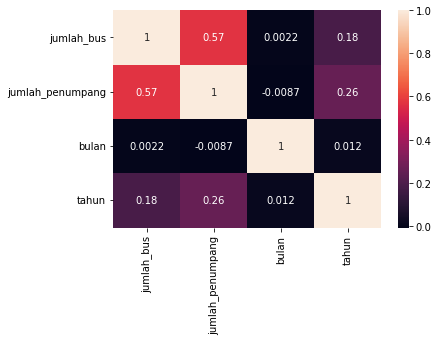

In [15]:
sns.heatmap(raw_df.corr(), annot=True)

<AxesSubplot:xlabel='jumlah_penumpang', ylabel='jumlah_bus'>

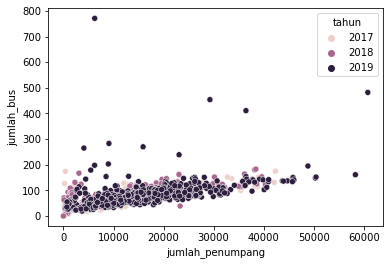

In [16]:
sns.scatterplot(x=raw_df['jumlah_penumpang'], y=raw_df['jumlah_bus'],hue=raw_df['tahun'])

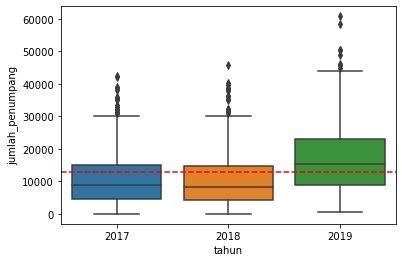

In [17]:
average_mean = raw_df['jumlah_penumpang'].mean()
sns.boxplot(x=raw_df['tahun'], y=raw_df['jumlah_penumpang'])
plt.axhline(average_mean, color='red', linestyle='dashed')

In [18]:
origin_count = raw_df.groupby(['type_operasi'], as_index=False).size()
origin_count.head(5)

,type_operasi,size
0,REGULER,721
1,ZONASI,435


<AxesSubplot:xlabel='size', ylabel='type_operasi'>

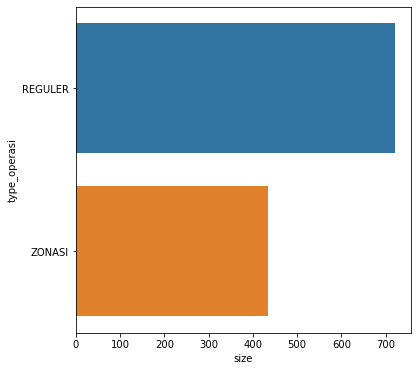

In [19]:
plt.figure(figsize=(6,6))
sns.barplot(y=origin_count['type_operasi'], x=origin_count['size'])

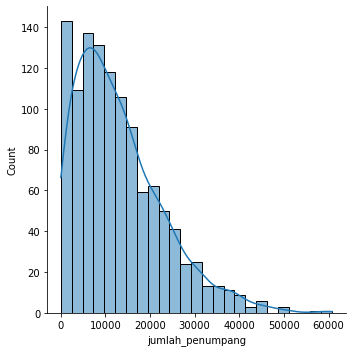

In [20]:
sns.displot(raw_df['jumlah_penumpang'], kde = True)

In [21]:
def jumlah_penumpang_level(jumlah_penumpang) :
    if jumlah_penumpang < 10000 :
        return 'low'
    elif jumlah_penumpang >= 10000 and jumlah_penumpang <= 18500:
        return 'medium'
    else :
        return 'high'
raw_df['jumlah_penumpang'] = raw_df['jumlah_penumpang'].apply(jumlah_penumpang_level)
raw_df.head()

,daerah_operasi,area_operasi,jumlah_bus,jumlah_penumpang,bulan,tahun
type_operasi,,,,,,
ZONASI,ZONA 1,ZONASI PONDOK GEDE - HALIM- CONDET - RANCHO,100,high,1,2017
ZONASI,ZONA 2,ZONASI KP.MELAYU - RAWAMANGUN,84,medium,1,2017
ZONASI,ZONA 3,ZONASI TERMINAL KALIDERES - KAMAL,67,medium,1,2017
ZONASI,ZONA 4,ZONASI KALIDERES -SEMANAN-DURIKOSAMBI,102,high,1,2017
ZONASI,ZONA 5,ZONASI PULO GADUNG-MARDANI-PASEBAN,68,medium,1,2017


<AxesSubplot:xlabel='jumlah_penumpang', ylabel='count'>

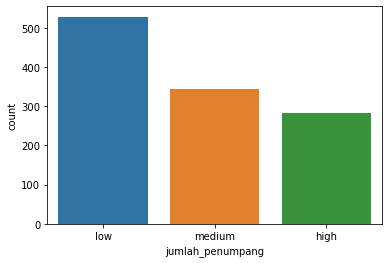

In [22]:
jumlah_penumpang_level = ["low", "medium", "high"]
sns.countplot(raw_df['jumlah_penumpang'], order=jumlah_penumpang_level)

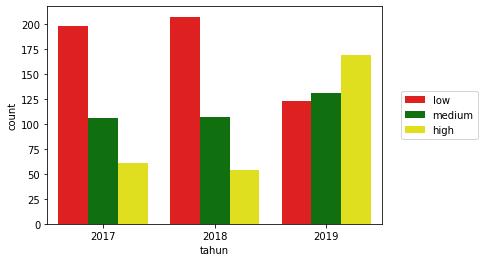

In [23]:
jumlah_penumpang_level = ["low", "medium", "high"]
color_pal = {
    "low":"red",
    "medium":"green",
    "high":"yellow"}
sns.countplot(x='tahun', data=raw_df, hue='jumlah_penumpang', hue_order=jumlah_penumpang_level,palette = color_pal)
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))

In [24]:
perc=raw_df['jumlah_penumpang'].value_counts(normalize=True)*100
perc

low       45.674740
medium    29.757785
high      24.567474
Name: jumlah_penumpang, dtype: float64

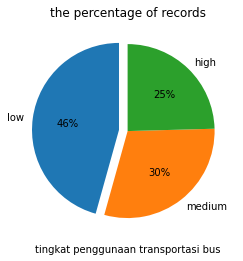

In [25]:
plt.pie(perc.values, labels=perc.index, startangle=90, autopct='%1.0f%%',explode=(0.1,0,0))

plt.title("the percentage of records")
plt.xlabel("tingkat penggunaan transportasi bus")
plt.show()

Insight yang bisa didapat setelah melakukan data tidying dan visualization :
1. Jumlah ketersediaan bus mempengaruhi jumlah penumpang apabila ada penambahan begitu pulaa dengan jumlah penumpang
2. tipe operasi lebih banyak pada sektor reguler dibanding dengan zonasi yang membutuhkan waktu dan jarak untuk mencapai sesuai dengan titik zonasi
3. tingkat penggunaan bus meningkat selama 3 tahun.
4. namun dalam prakteknya penggunaan bus masih rendah, namun di tahun 2019 terjadi peningkatan pesat.

## NOMOR 2 (Data Siswa dan Guru 2019 - 2021)

In [26]:
raw_df2 = pd.read_csv('Data Siswa & Guru Kota Jakarta 2019-2021.csv')

In [27]:
raw_df2

,nama_sekolah,npsn,bp,status,pd,guru,kecamatan,wilayah,tahun
0,SMAN 33 JAKARTA,20101620,SMA,1,746,40,Cengkareng,1,2019
1,SMAN 96 JAKARTA,20101583,SMA,1,750,42,Cengkareng,1,2019
2,SMA Kasih Bagi Bangsa,69980323,SMA,2,35,8,Cengkareng,1,2019
3,SMA LAMAHOLOT,20101314,SMA,2,87,7,Cengkareng,1,2019
4,SMAS 2 KRISTEN KALAM KUDUS,20104426,SMA,2,153,14,Cengkareng,1,2019
...,...,...,...,...,...,...,...,...,...
1455,SMA MAHABODHI VIDYA,69989073,SMA,2,80,8,Kali Deres,1,2021
1456,SMA MAKARIOS,69993191,SMA,2,67,16,Kembangan,1,2021
1457,SMA HERITAGE SCHOOL JAKARTA,70003010,SMA,2,18,9,Kebayoran Lama,3,2021
1458,SMA 2 PERGURUAN CIKINI,70004534,SMA,2,78,18,Jagakarsa,3,2021


Note :
- ## status
- 1 = negeri
- 2 = swasta
- ## wilayah
- 1 = Jakarta Barat
- 2 = Jakarta Timur
- 3 = Jakarta Selatan
- 4 = Jakarta Pusat
- 5 = Jakarta Utara
- 6 = Kepulauan Seribu

In [28]:
raw_df2.describe()

,status,pd,guru,wilayah,tahun
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.763014,336.190411,22.921918,2.753425,2019.999315
std,0.425380,291.572324,15.502263,1.418383,0.820822
min,1.000000,0.000000,0.000000,1.000000,2019.000000
25%,2.000000,91.750000,11.000000,2.000000,2019.000000
50%,2.000000,224.000000,18.000000,3.000000,2020.000000
75%,2.000000,576.250000,35.000000,4.000000,2021.000000
max,2.000000,1276.000000,78.000000,6.000000,2021.000000


In [29]:
raw_df2.shape

(1460, 9)

In [30]:
raw_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nama_sekolah  1460 non-null   object
 1   npsn          1460 non-null   object
 2   bp            1460 non-null   object
 3   status        1460 non-null   int64 
 4   pd            1460 non-null   int64 
 5   guru          1460 non-null   int64 
 6   kecamatan     1460 non-null   object
 7   wilayah       1460 non-null   int64 
 8   tahun         1460 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 102.8+ KB


In [31]:
raw_df2.isna().sum()

nama_sekolah    0
npsn            0
bp              0
status          0
pd              0
guru            0
kecamatan       0
wilayah         0
tahun           0
dtype: int64

In [32]:
raw_df2.corr()

,status,pd,guru,wilayah,tahun
status,1.000000,-0.803540,-0.759578,-0.017398,-0.000465
pd,-0.803540,1.000000,0.940159,-0.017875,0.008197
guru,-0.759578,0.940159,1.000000,-0.022447,-0.015248
wilayah,-0.017398,-0.017875,-0.022447,1.000000,-0.001911
tahun,-0.000465,0.008197,-0.015248,-0.001911,1.000000


<AxesSubplot:>

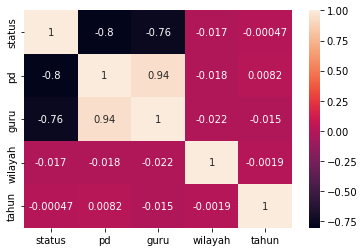

In [33]:
sns.heatmap(raw_df2.corr(), annot=True)

In [34]:
def clean_status(status):
  if status == 1:
    return 'negeri'
  elif status == 2:
    return 'swasta'


raw_df2['status'] = raw_df2['status'].apply(clean_status)
raw_df2['status']

0       negeri
1       negeri
2       swasta
3       swasta
4       swasta
         ...  
1455    swasta
1456    swasta
1457    swasta
1458    swasta
1459    swasta
Name: status, Length: 1460, dtype: object

In [35]:
def clean_wilayah(wilayah):
    if wilayah == 1:
        return 'Jakarta Barat'
    elif wilayah == 2:
        return 'Jakarta Timur'
    elif wilayah == 3:
        return 'Jakarta Selatan'
    elif wilayah == 4:
        return 'Jakarta Pusat'
    elif wilayah == 5:
        return 'Jakarta Utara'
    else :
        return 'Kepulauan Seribu'
    
raw_df2['wilayah'] = raw_df2['wilayah'].apply(clean_wilayah)
raw_df2['wilayah']

0         Jakarta Barat
1         Jakarta Barat
2         Jakarta Barat
3         Jakarta Barat
4         Jakarta Barat
             ...       
1455      Jakarta Barat
1456      Jakarta Barat
1457    Jakarta Selatan
1458    Jakarta Selatan
1459      Jakarta Barat
Name: wilayah, Length: 1460, dtype: object

<AxesSubplot:xlabel='guru', ylabel='pd'>

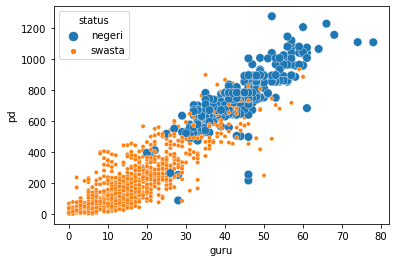

In [36]:
sns.scatterplot(x=raw_df2['guru'], y=raw_df2['pd'],hue=raw_df2['status'],size=raw_df2['status'])

<AxesSubplot:xlabel='guru', ylabel='pd'>

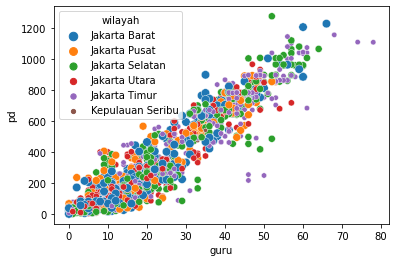

In [37]:
sns.scatterplot(x=raw_df2['guru'], y=raw_df2['pd'],hue=raw_df2['wilayah'],size=raw_df2['wilayah'])

<AxesSubplot:xlabel='guru', ylabel='pd'>

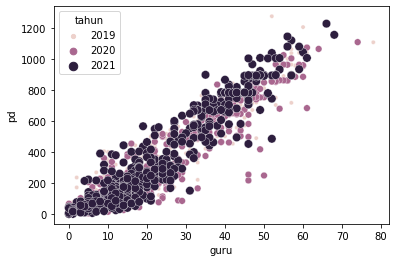

In [38]:
sns.scatterplot(x=raw_df2['guru'], y=raw_df2['pd'],hue=raw_df2['tahun'],size=raw_df2['tahun'])

<AxesSubplot:xlabel='status', ylabel='guru'>

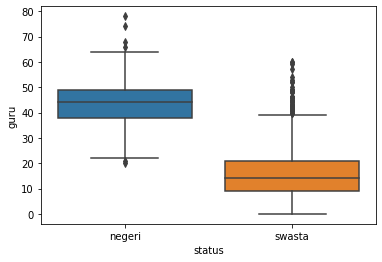

In [39]:
sns.boxplot(x=raw_df2['status'], y=raw_df2['guru'])

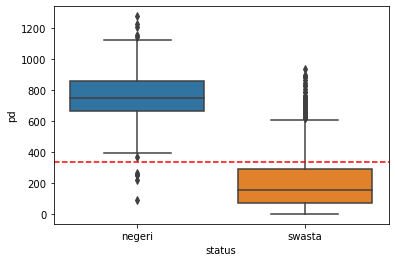

In [40]:
average_mean = raw_df2['pd'].mean()
sns.boxplot(x=raw_df2['status'], y=raw_df2['pd'])
plt.axhline(average_mean, color='red', linestyle='dashed')

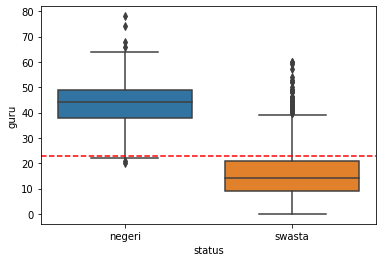

In [41]:
average_mean = raw_df2['guru'].mean()
sns.boxplot(x=raw_df2['status'], y=raw_df2['guru'])
plt.axhline(average_mean, color='red', linestyle='dashed')

In [42]:
origin_count = raw_df2.groupby(['wilayah'], as_index=False).size()
origin_count.head(5)

,wilayah,size
0,Jakarta Barat,351
1,Jakarta Pusat,168
2,Jakarta Selatan,308
3,Jakarta Timur,365
4,Jakarta Utara,265


<AxesSubplot:xlabel='size', ylabel='wilayah'>

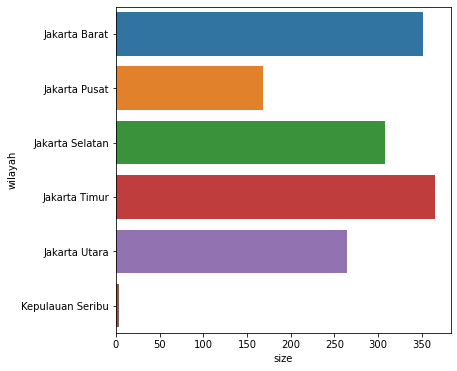

In [43]:
plt.figure(figsize=(6,6))
sns.barplot(y=origin_count['wilayah'], x=origin_count['size'])

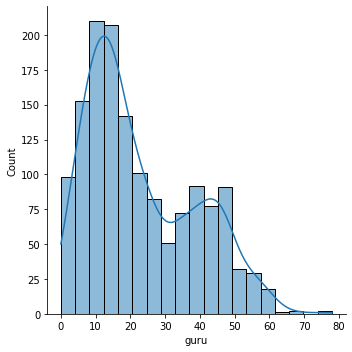

In [44]:
sns.displot(raw_df2['guru'], kde = True)

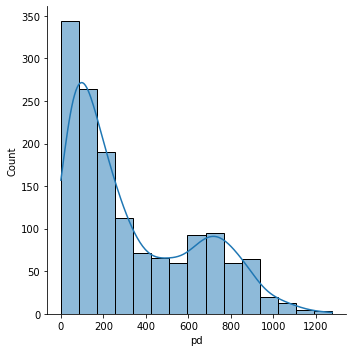

In [45]:
sns.displot(raw_df2['pd'], kde = True)

In [51]:
def jumlah_guru_level(guru) :
    if guru < 11 :
        return 'Kurang'
    else :
        return 'Banyak'
raw_df2['guru'] = raw_df2['guru'].apply(jumlah_guru_level)
raw_df2.head()

TypeError: '<' not supported between instances of 'str' and 'int'

<AxesSubplot:xlabel='guru', ylabel='count'>

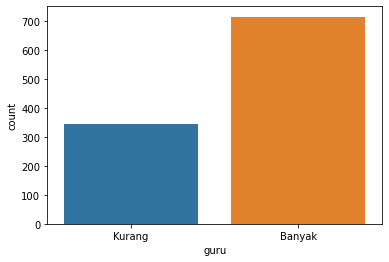

In [53]:
jumlah_guru_level = ["Kurang", "Banyak"]
sns.countplot(raw_df2['guru'], order=jumlah_guru_level)

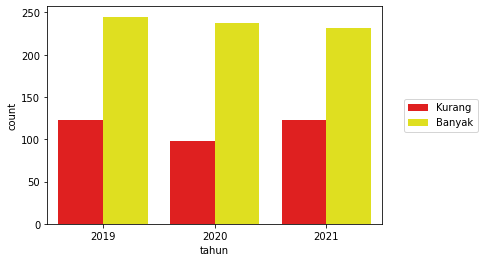

In [55]:
jumlah_guru_level = ["Kurang", "Banyak"]
color_pal = {
    "Kurang":"red",
    "Banyak":"yellow"}
sns.countplot(x='tahun', data=raw_df2, hue='guru', hue_order=jumlah_guru_level,palette = color_pal)
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))

In [56]:
perc=raw_df2['guru'].value_counts(normalize=True)*100
perc

Banyak    48.904110
Cukup     27.534247
Kurang    23.561644
Name: guru, dtype: float64

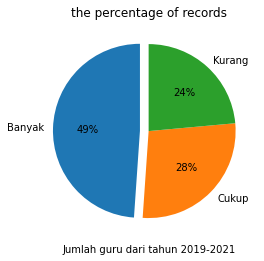

In [57]:
plt.pie(perc.values, labels=perc.index, startangle=90, autopct='%1.0f%%',explode=(0.1,0,0))

plt.title("the percentage of records")
plt.xlabel("Jumlah guru dari tahun 2019-2021")
plt.show()

Insight yang bisa didapat setelah melakukan data tidying dan visualization :
1. Jumlah guru dan peserta didik memiliki korelasi yang kuat yaitu dengan jumlah guru selaras dengan jumlah peserta didik
2. dari persebaran data antara jumlah peserta didik dan guru tahun 2021 memilik jumlah yang tinggi dari tahun sebelumnnya
3. wilayah jakarta barat memiliki jumlah guru dan peserta didik paling tinggi
4. Diperlukan perhatian khusus untuk jumlah guru di daerah jakarta timur dan kepulauan seribu
5. rata-rata jumlah guru dan peserta didik di swasta lebih rendah dari sekolah negeri